# How Hard is it to read Philosophy?: A Brief Analysis of the Readability of 59 Philosophy Texts

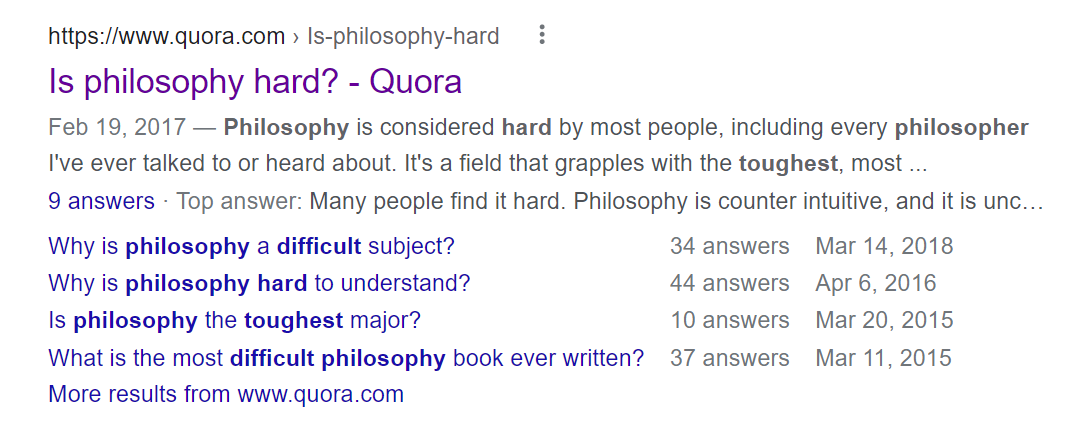

# 1. Introduction
From the screenshot above, we can see that many people think philosophy is a difficult subject. Furthermore, according to a [blog post](https://blog.apaonline.org/2020/01/08/teachers-assemble-the-case-for-high-school-philosophy-across-disciplines/) from the Blog of APA, **"Of all the major disciplines, philosophy is the least likely to be taught in American primary or secondary schools, either as a core subject required for graduation or as an optional elective for interested and engaged students."** In contrast, in France where I studied before, philosophy is a required subject for all high school students. However, many of my French friends have complained about how difficulty is it for them as high school students to understand their philosophy classes.

In this project, I want to explore the question: **how hard is philosophy? Specifically, what is the difficulty to read philosophy texts.** While readability is not the only element determining the complexity of learning a subject, it is an important factor impact factors such as what level of education is needed in order to study the subject and whether ordinary people would be interested in learning the subject.

In additional providing information on the question, another objective of this analysis is to provide information for those who are scared of reading philosophy texts because of the public's perception on the difficulty of reading philosophy. I want use this analysis to provide some insights on what are the texts that are potentially easier to read for beginners in philosophy.

I will be using the [History of Philosophy](https://www.kaggle.com/kouroshalizadeh/history-of-philosophy) dataset (for the [Philosophy Data Project](http://philosophydata.com/)). According to Kourosh Alizadeh, the contributor of the dataset, **"the dataset contains over 300,000 sentences from over 50 texts spanning 10 major schools of philosophy. The represented schools are: Plato, Aristotle, Rationalism, Empiricism, German Idealism, Communism, Capitalism, Phenomenology, Continental Philosophy, and Analytic Philosophy."**



## 2. Data Wrangling

In [1]:
# import packages
import os
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import cmudict
import syllables
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [2]:
# print versions of Python modules and packages with watermark. (https://github.com/rasbt/watermark)
%load_ext watermark
%watermark -v -p numpy,pandas,nltk,syllables,matplotlib,sklearn,wordcloud

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

numpy     : 1.20.3
pandas    : 1.3.4
nltk      : 3.6.5
syllables : 1.0.3
matplotlib: 3.4.3
sklearn   : 0.24.2
wordcloud : 1.8.1



In [3]:
# load the data
# os.listdir()
data_raw = pd.read_csv("../data/philosophy_data.csv")
print(data_raw.shape)
data_raw.head()

(360808, 11)


title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...  
3                          what be this -PRON- say ?  
4   someone must have indict -PRON- , for -PRON- ...

In [4]:
data_raw.info()
# We do not have any missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


In [5]:
#  Drop the columns that are not relavent.
df = data_raw.drop(columns = ["sentence_str", "sentence_length", "sentence_lowered", "lemmatized_str", "tokenized_txt"])
print(df.info())
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   original_publication_date  360808 non-null  int64 
 5   corpus_edition_date        360808 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 16.5+ MB
None


In [6]:
tot_sentences = len(df["sentence_spacy"])
print(f"The dataset contains {tot_sentences} sentences (rows) with {sum(df.duplicated())} duplicated rows")

tot_titles = len(df["title"].unique())
tot_authors = len(df["author"].unique())
tot_schools = len(df["school"].unique())
print("The dataset includes {t} books by {a} authors from {s} schools."
      .format(t=tot_titles,
              a=tot_authors,
              s=tot_schools))

The dataset contains 360808 sentences (rows) with 0 duplicated rows
The dataset includes 59 books by 36 authors from 13 schools.


In [7]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   original_publication_date  360808 non-null  int64 
 5   corpus_edition_date        360808 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 16.5+ MB
None


title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  
0                       -350                 1997  
1                       -350                 1997  
2                       -350                 1997  
3                       -350                 1997  
4                       -350                 1997

## 3. What are the readabilities of philosophy texts?
### 3.1 Defining readability
According to a [Wikipedia page](https://en.wikipedia.org/wiki/Readability) about readability, **"Readability is the ease with which a reader can understand a written text. In natural language, the readability of text depends on its content (the complexity of its vocabulary and syntax) and its presentation (such as typographic aspects that affect legibility, like font size, line height, character spacing, and line length)."** The **[Flesch reading-ease test](https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests)** is one of the most popular measures of readability. In this project, I will mainly use the score from the Flesch reading-ease test as the reference **(a lower score means higher difficult)**. At the same time, a modified version, Flesch–Kincaid grade level will also be calculated.

\begin{equation}Flesch\:reading\:ease\:score = 206.835 - 1.015\times \frac{total\:words}{total\:sentences}-84.6\times \frac{total\:syllables}{total\:words}
\end{equation}

\begin{equation}Flesch-Kincaid\:grade\:level = 0.39\times \frac{total\:words}{total\:sentences} + 11.8\times \frac{total\:syllables}{total\:words} - 15.59
\end{equation}


In order to calculate the scores, we need to calculate 3 components:
- Total number of sentences in a text
- Total number of words in a text
- Total number of syllables in a text

While the total number of sentences can be calculated by counting the number of rows containing that specific title and the total number of words can be calculated by tokenizing the words and sum up the number of tokenized words, the total number of syllables in a text is much harder to be calculated. 
I will use the method introduced in the [post](https://stackoverflow.com/questions/405161/detecting-syllables-in-a-word/4103234#4103234). The method can be summarized by counting the "stress marker" in a word to estimate the number of syllables in a word wit the help of pronouncing dictionary([cmudict](http://www.speech.cs.cmu.edu/cgi-bin/cmudict)). While the estimation is generally accurate with the method, the main drawback is that the some words are not contained in the cmudict. In that case, I will use the [syllables](https://pypi.org/project/syllables/) package to estimate the number of syllables.

In [8]:
# https://stackoverflow.com/questions/405161/detecting-syllables-in-a-word/4103234#4103234
d = cmudict.dict()

# Use the method relying on cmudict first (more accurate), if the word is not contained in the dictionary, use syllables.estimate()
def count_syllables(words):
    n = 0
    for word in words:
        try:
            n += [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]][0]
        except KeyError:
            n += syllables.estimate(word)
    return n

# use NLTK to tokenize the texts, because stopwords such as pronounce also impact the results of the readability score,
# I will not drop the stopwords at this stage
tokens_list = []
num_words_list = []
num_syllables_list = []
for idx in df.index:
    tokens = word_tokenize(df.sentence_spacy[idx])
    tokens = [w.lower() for w in tokens]
    tokens = [w for w in tokens if w.isalpha()]
    tokens_list.append(tokens)
    num_words_list.append(len(tokens))
    num_syllables_list.append(count_syllables(tokens))
df["tokenized_words"] = tokens_list
df["num_words"] = num_words_list
df["num_syllables"] = num_syllables_list

In [9]:
print(df["num_words"].describe())
print("------------------------------------")
print(df["num_syllables"].describe())

count    360808.00000
mean         26.29432
std          18.14708
min           0.00000
25%          13.00000
50%          22.00000
75%          35.00000
max         415.00000
Name: num_words, dtype: float64
------------------------------------
count    360808.000000
mean         40.849166
std          28.795595
min           0.000000
25%          20.000000
50%          34.000000
75%          54.000000
max         770.000000
Name: num_syllables, dtype: float64


In [10]:
# Sum up total number of words, syllables, and sentences for each text 
df_title = df.groupby(["title","author","school", "original_publication_date","corpus_edition_date"]).sum().reset_index().set_index("title")
df_title = df_title.join(df.groupby(["title"])["sentence_spacy"].count())
df_title = df_title.rename(columns = {"num_words": "tot_words", "num_syllables": "tot_syllables", "sentence_spacy": "tot_sens"})
df_title.head()

author       school  \
title                                                                        
A General Theory Of Employment, Interest, And M...     Keynes   capitalism   
A Treatise Concerning The Principles Of Human K...   Berkeley   empiricism   
A Treatise Of Human Nature                               Hume   empiricism   
Anti-Oedipus                                          Deleuze  continental   
Aristotle - Complete Works                          Aristotle    aristotle   

                                                    original_publication_date  \
title                                                                           
A General Theory Of Employment, Interest, And M...                       1936   
A Treatise Concerning The Principles Of Human K...                       1710   
A Treatise Of Human Nature                                               1739   
Anti-Oedipus                                                             1972   
Aristotle - Complete Works                                               -320   

                                                    corpus_edition_date  \
title                                                                     
A General Theory Of Employment, Interest, And M...                 2003   
A Treatise Concerning The Principles Of Human K...                 2009   
A Treatise Of Human Nature                                         2003   
Anti-Oedipus                                                       1997   
Aristotle - Complete Works                                         1991   

                                                    tot_words  tot_syllables  \
title                                                                          
A General Theory Of Employment, Interest, And M...     113565         184909   
A Treatise Concerning The Principles Of Human K...      34297          51865   
A Treatise Of Human Nature                             222615         359227   
Anti-Oedipus                                           182730         310583   
Aristotle - Complete Works                            1368844        1970601   

                                                    tot_sens  
title                                                         
A General Theory Of Employment, Interest, And M...      3411  
A Treatise Concerning The Principles Of Human K...      1040  
A Treatise Of Human Nature                              7047  
Anti-Oedipus                                            6679  
Aristotle - Complete Works                             48779

In [11]:
print(df_title["tot_words"].describe())
print("------------------------------------")
print(df_title["tot_syllables"].describe())
print("------------------------------------")
print(df_title["tot_sens"].describe())

count    5.900000e+01
mean     1.608000e+05
std      2.067191e+05
min      7.057000e+03
25%      5.537850e+04
50%      1.135650e+05
75%      1.888670e+05
max      1.368844e+06
Name: tot_words, dtype: float64
------------------------------------
count    5.900000e+01
mean     2.498086e+05
std      3.004174e+05
min      1.005800e+04
25%      8.106300e+04
50%      1.792360e+05
75%      3.101265e+05
max      1.970601e+06
Name: tot_syllables, dtype: float64
------------------------------------
count       59.000000
mean      6115.389831
std       7964.661865
min        323.000000
25%       1945.000000
50%       4469.000000
75%       7236.000000
max      48779.000000
Name: tot_sens, dtype: float64


### 3.2 Calculating readability scores
Now I will use the following formulas to calculate the readability scores
\begin{equation}Flesch\:reading\:ease\:score = 206.835 - 1.015\times \frac{total\:words}{total\:sentences}-84.6\times \frac{total\:syllables}{total\:words}
\end{equation}

\begin{equation}Flesch-Kincaid\:grade\:level = 0.39\times \frac{total\:words}{total\:sentences} + 11.8\times \frac{total\:syllables}{total\:words} - 15.59
\end{equation}

In [12]:
# Flesch reading ease score
def FleschTest(totWords, totSyllables, totSentences):
    return 206.835 - 1.015*(totWords/totSentences) - 84.6*(totSyllables/totWords)
# Flesch-Kincaid grade level
def gradeTest(totWords, totSyllables, totSentences):
    return 0.39*(totWords/totSentences) + 11.8*(totSyllables/totWords) - 15.59

In [13]:
df_title["Flesch_score"] = np.round(FleschTest(df_title["tot_words"], df_title["tot_syllables"], df_title["tot_sens"]), 1)
df_title["grade_level"] = np.round(gradeTest(df_title["tot_words"], df_title["tot_syllables"], df_title["tot_sens"]))
df_title = df_title.sort_values("Flesch_score")
df_title.head()

author  \
title                                                           
Discourse On Method                                 Descartes   
The Crisis Of The European Sciences And Phenome...    Husserl   
The Order Of Things                                  Foucault   
Critique Of Judgement                                    Kant   
The Birth Of The Clinic                              Foucault   

                                                             school  \
title                                                                 
Discourse On Method                                     rationalism   
The Crisis Of The European Sciences And Phenome...    phenomenology   
The Order Of Things                                     continental   
Critique Of Judgement                               german_idealism   
The Birth Of The Clinic                                 continental   

                                                    original_publication_date  \
title                                                                           
Discourse On Method                                                      1637   
The Crisis Of The European Sciences And Phenome...                       1936   
The Order Of Things                                                      1966   
Critique Of Judgement                                                    1790   
The Birth Of The Clinic                                                  1963   

                                                    corpus_edition_date  \
title                                                                     
Discourse On Method                                                2008   
The Crisis Of The European Sciences And Phenome...                 1970   
The Order Of Things                                                2002   
Critique Of Judgement                                              2007   
The Birth Of The Clinic                                            2003   

                                                    tot_words  tot_syllables  \
title                                                                          
Discourse On Method                                     23019          34047   
The Crisis Of The European Sciences And Phenome...     150089         263842   
The Order Of Things                                    171240         281554   
Critique Of Judgement                                  153146         250363   
The Birth Of The Clinic                                 75578         128908   

                                                    tot_sens  Flesch_score  \
title                                                                        
Discourse On Method                                      340          13.0   
The Crisis Of The European Sciences And Phenome...      4832          26.6   
The Order Of Things                                     4689          30.7   
Critique Of Judgement                                   4204          31.6   
The Birth Of The Clinic                                 2518          32.1   

                                                    grade_level  
title                                                            
Discourse On Method                                        28.0  
The Crisis Of The European Sciences And Phenome...         17.0  
The Order Of Things                                        18.0  
Critique Of Judgement                                      18.0  
The Birth Of The Clinic                                    16.0

In [14]:
print(df_title["Flesch_score"].describe())
print("------------------------------------")
print(df_title["grade_level"].describe())

count    59.000000
mean     46.033898
std      11.862206
min      13.000000
25%      38.950000
50%      45.400000
75%      52.700000
max      75.400000
Name: Flesch_score, dtype: float64
------------------------------------
count    59.000000
mean     13.728814
std       3.402993
min       6.000000
25%      12.000000
50%      14.000000
75%      15.000000
max      28.000000
Name: grade_level, dtype: float64


In [15]:
print('The book that is most difficult to read is "{t}" by {a} originally published in {y} with a Flesch reading-ease score of {s}'
     .format(t=df_title.index[0], a=df_title.iloc[0,0], y=df_title.iloc[0,1], s=df_title.iloc[0,-2]))
print('The book that is easiest to read is "{t}" by {a} originally published in {y} with a Flesch reading-ease score of {s}'
     .format(t=df_title.index[-1], a=df_title.iloc[-1,0], y=df_title.iloc[-1,1], s=df_title.iloc[-1,-2]))

The book that is most difficult to read is "Discourse On Method" by Descartes originally published in rationalism with a Flesch reading-ease score of 13.0
The book that is easiest to read is "Thus Spake Zarathustra" by Nietzsche originally published in nietzsche with a Flesch reading-ease score of 75.4


We can see that the range of readability is actually very wide for the 59 texts. The readability score ranges from 75.4 to 13.0, meaning that while some texts are extremely difficult to understand, some are actually relatively easy. For people who want to start reading philosophy, you can choose those with higher readability scores to begin with! The specific intepretation of the score will be shown below.

### 3.3 Intepretating readability scores
The [interpretation](https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests) of the Flesch reading ease score:
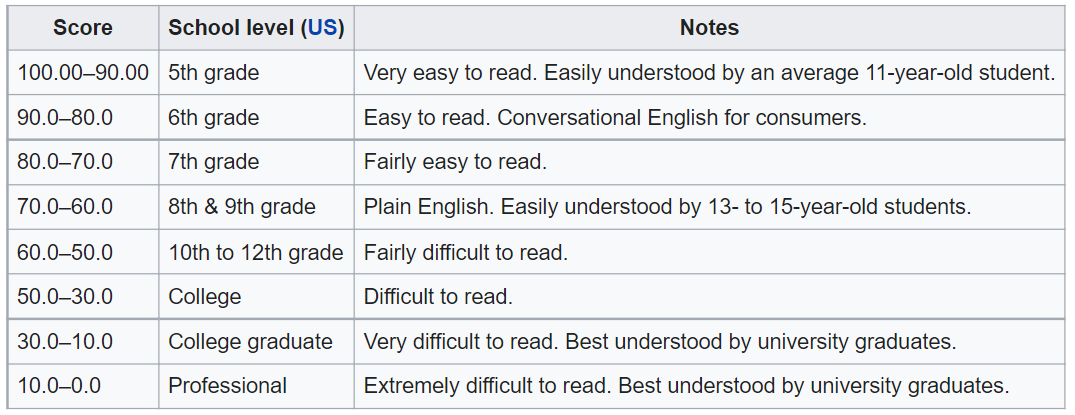

In [16]:
# Converting the score into the corresponding school level
def scoreToLevel(x):
    if x > 90:
        return "5th grade"
    elif x > 90:
        return "6th grade"
    elif x > 70:
        return "7th grade"
    elif x > 60:
        return "8th & 9th grade"
    elif x > 50:
        return "10th to 12th grade"
    elif x > 30:
        return "College"
    elif x > 10:
        return "College graduate"
    else:
        return "Professional"

In [17]:
school_level_list = []
for idx in range(len(df_title.index)):
    school_level_list.append(scoreToLevel(df_title["Flesch_score"][idx]))
df_title["school_level"] = school_level_list

counts = df_title.groupby(["school_level"])["school_level"].count()
counts = counts.reindex(["College graduate", "College", "10th to 12th grade", "8th & 9th grade", "7th grade"])
counts

school_level
College graduate       2
College               36
10th to 12th grade    14
8th & 9th grade        4
7th grade              3
Name: school_level, dtype: int64

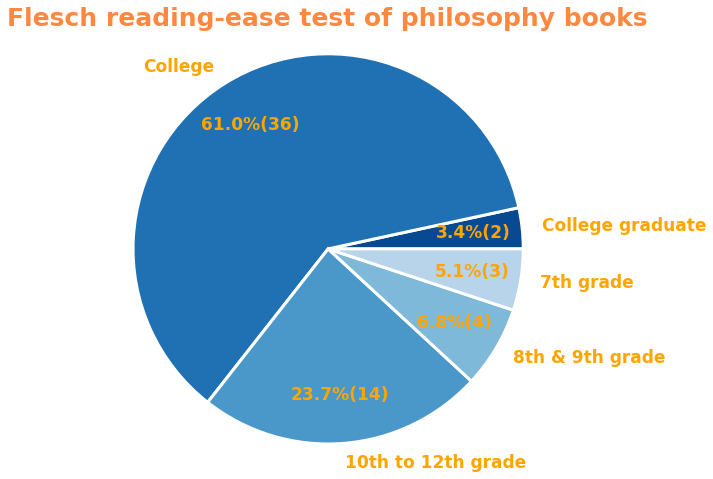

In [18]:
# Use a pie char to visualize the finding
plt.figure(figsize=[10,8])
colors = plt.get_cmap("Blues")(np.linspace(0.9, 0.3, len(counts)))
counts.plot(kind="pie",  colors=colors, 
            wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
            autopct=lambda p: "{:.1f}%({:.0f})".format(p,(p/100)*counts.sum()), 
            pctdistance=0.75,
            textprops={"fontsize":17, "color":"#FFA500", "fontweight":"bold"})
plt.axis("equal")
plt.ylabel("")
plt.title("Flesch reading-ease test of philosophy books", fontsize=25, color="#FF8840", fontweight="bold", 
          horizontalalignment="center")
plt.savefig("../output/pie_chart.png")
plt.show()

From the graph, we can see that in general, the philosophy texts are hard to read (61% of them are college level readings). This level of difficulty to read partially explains why American high schools rarely offer philosophy classes and why French high school students find understanding class contents difficult. However, surprisingly, only 2 texts are at college graduate level and non in the professional level! This means that while reading the philosophy texts shouldn't be difficult for many of us (college students), fully understanding them might be the real reason behind people's perception of philosophy being a difficult subject. The 5 most difficult texts based on the readability test are:

In [19]:
df_title.drop(columns = {"tot_words", "tot_syllables", "tot_sens"}).head()

author  \
title                                                           
Discourse On Method                                 Descartes   
The Crisis Of The European Sciences And Phenome...    Husserl   
The Order Of Things                                  Foucault   
Critique Of Judgement                                    Kant   
The Birth Of The Clinic                              Foucault   

                                                             school  \
title                                                                 
Discourse On Method                                     rationalism   
The Crisis Of The European Sciences And Phenome...    phenomenology   
The Order Of Things                                     continental   
Critique Of Judgement                               german_idealism   
The Birth Of The Clinic                                 continental   

                                                    original_publication_date  \
title                                                                           
Discourse On Method                                                      1637   
The Crisis Of The European Sciences And Phenome...                       1936   
The Order Of Things                                                      1966   
Critique Of Judgement                                                    1790   
The Birth Of The Clinic                                                  1963   

                                                    corpus_edition_date  \
title                                                                     
Discourse On Method                                                2008   
The Crisis Of The European Sciences And Phenome...                 1970   
The Order Of Things                                                2002   
Critique Of Judgement                                              2007   
The Birth Of The Clinic                                            2003   

                                                    Flesch_score  grade_level  \
title                                                                           
Discourse On Method                                         13.0         28.0   
The Crisis Of The European Sciences And Phenome...          26.6         17.0   
The Order Of Things                                         30.7         18.0   
Critique Of Judgement                                       31.6         18.0   
The Birth Of The Clinic                                     32.1         16.0   

                                                        school_level  
title                                                                 
Discourse On Method                                 College graduate  
The Crisis Of The European Sciences And Phenome...  College graduate  
The Order Of Things                                          College  
Critique Of Judgement                                        College  
The Birth Of The Clinic                                      College

Furthermore, many of the texts have the readability levels of high school students. While in reality, they might be a bit harder to read due to the abstract nature of contents, you can probably choose those to start if you want to learn more about philosophy. The 5 easist texts based on the readability test are:

In [20]:
df_title.drop(columns = {"tot_words", "tot_syllables", "tot_sens"}).tail()

author     school  \
title                                                   
Enchiridion                      Epictetus   stoicism   
Plato - Complete Works               Plato      plato   
Philosophical Investigations  Wittgenstein   analytic   
On Certainty                  Wittgenstein   analytic   
Thus Spake Zarathustra           Nietzsche  nietzsche   

                              original_publication_date  corpus_edition_date  \
title                                                                          
Enchiridion                                         125                 2014   
Plato - Complete Works                             -350                 1997   
Philosophical Investigations                       1953                 1986   
On Certainty                                       1950                 1969   
Thus Spake Zarathustra                             1887                 2008   

                              Flesch_score  grade_level     school_level  
title                                                                     
Enchiridion                           64.1         10.0  8th & 9th grade  
Plato - Complete Works                66.6          9.0  8th & 9th grade  
Philosophical Investigations          72.9          7.0        7th grade  
On Certainty                          75.1          7.0        7th grade  
Thus Spake Zarathustra                75.4          6.0        7th grade

## 3.4 The hardest phrases from a selection of texts
Even though we have the Flesch reading ease score for each text, we can use wordcloud to represent some of the hardest phrases in each text to give a more direct representation of the sentence complexity from each work.

I will use the ratio of number of syllables to number of words in each sentence as the indicator of each sentence's complexity.

In [21]:
df["ratio"] = df["num_syllables"]/df["num_words"]
df.ratio.describe()

count    360798.000000
mean          1.560345
std           0.276988
min           0.857143
25%           1.379310
50%           1.533333
75%           1.705882
max           6.000000
Name: ratio, dtype: float64

I want to show what are the hardest sentences in each text look like to give the audience a better impression of level of difficulties in each text. However, due to the limitation of space, I will choose every 4th text (based on the ranking of the Flesch reading ease score) as the source of the wordcloud.

For those who want to read any of these texts, you can see if you can understand those hardest sentences before you make the decision to read the book or not.

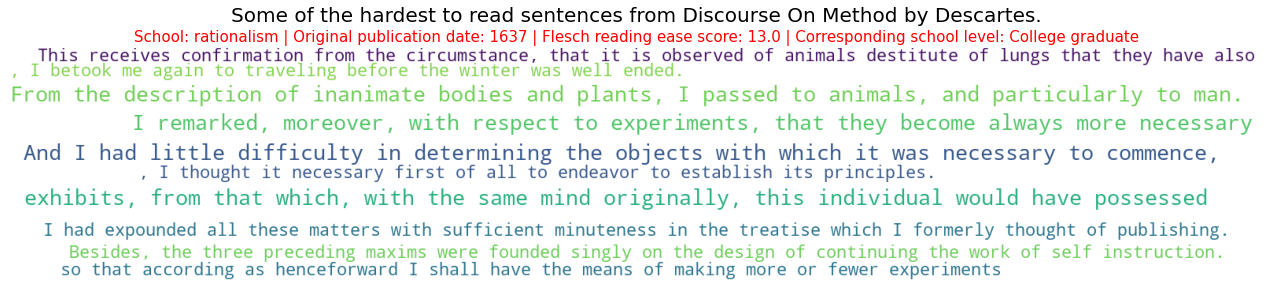

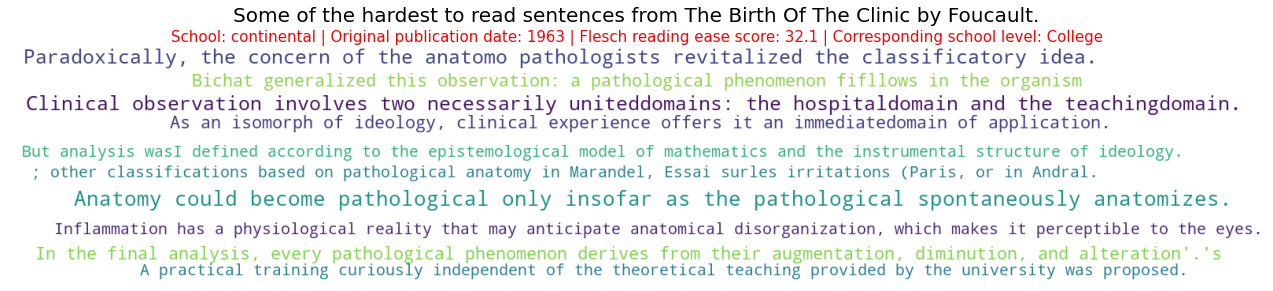

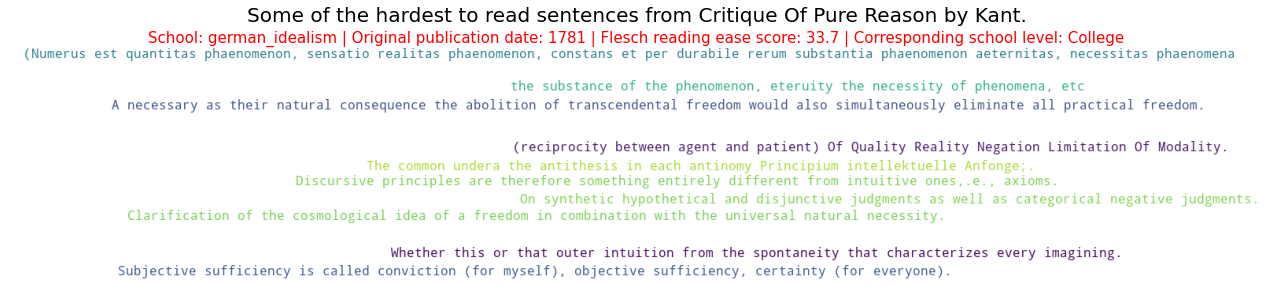

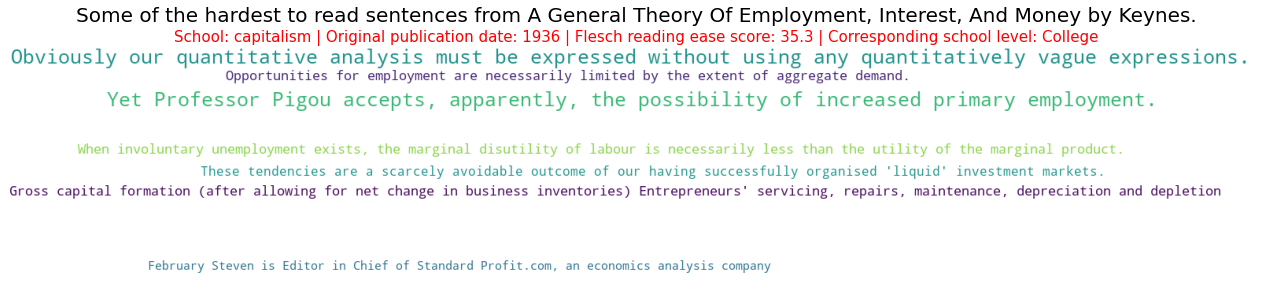

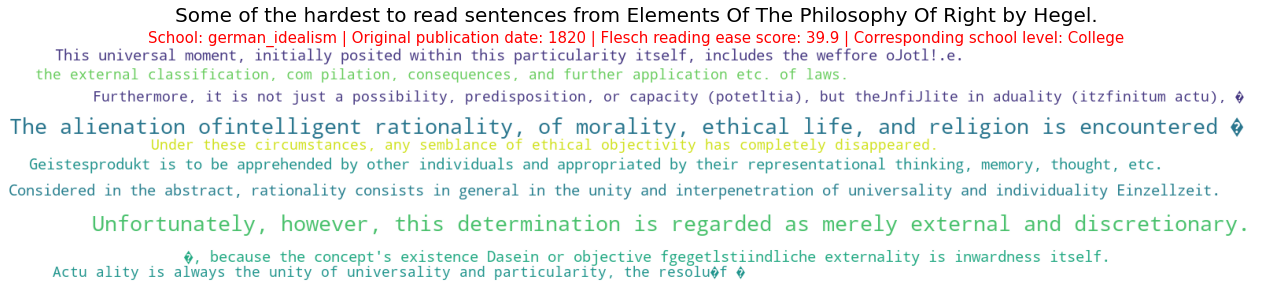

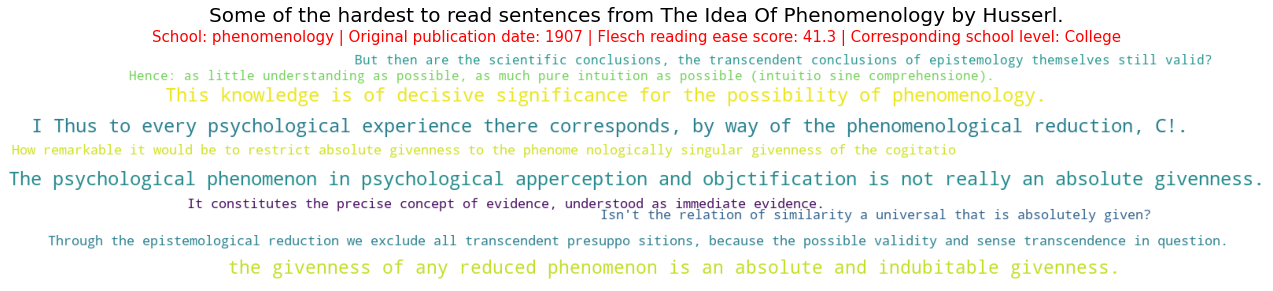

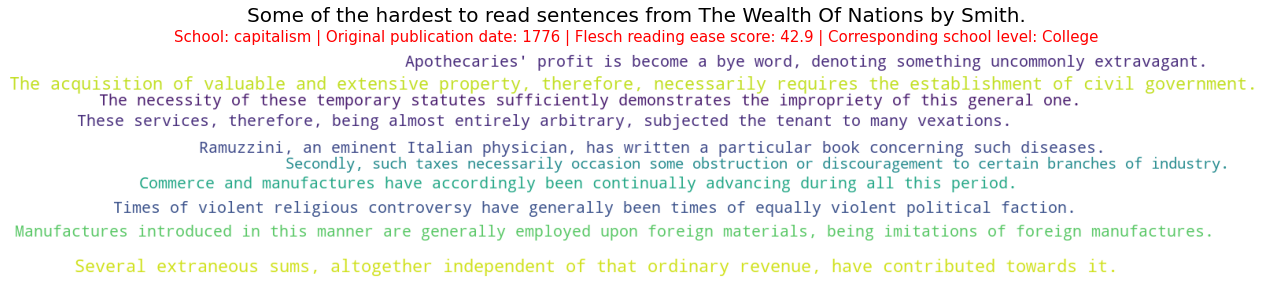

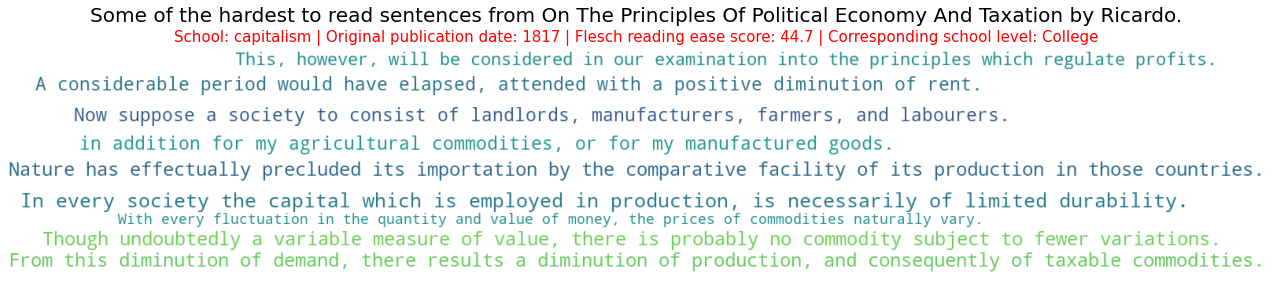

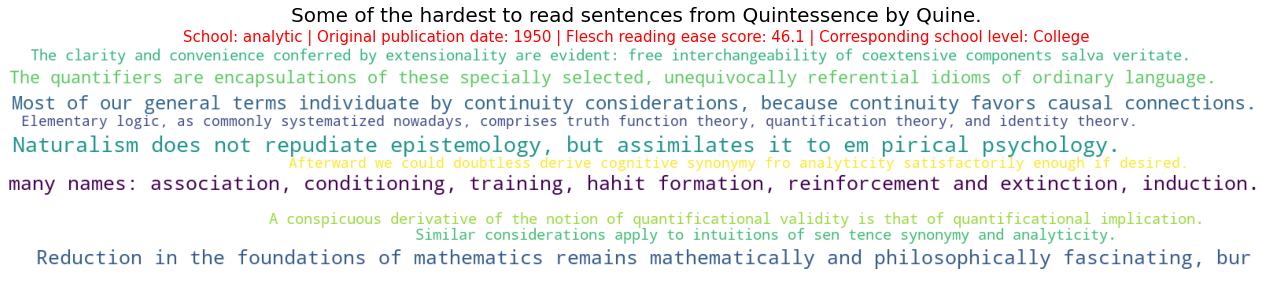

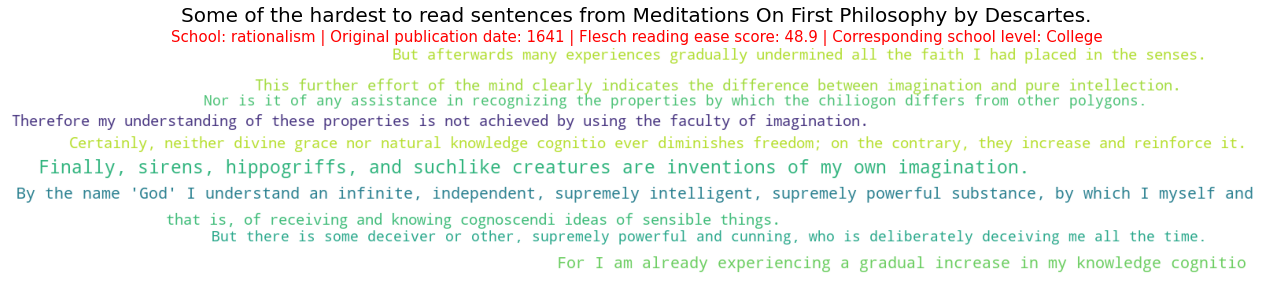

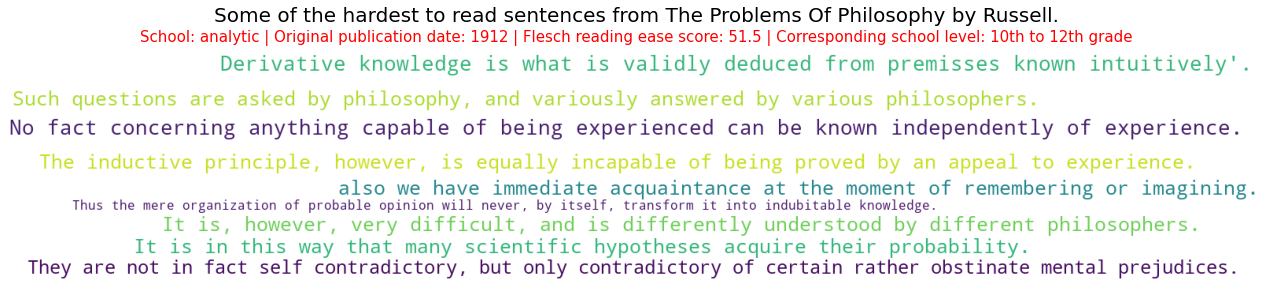

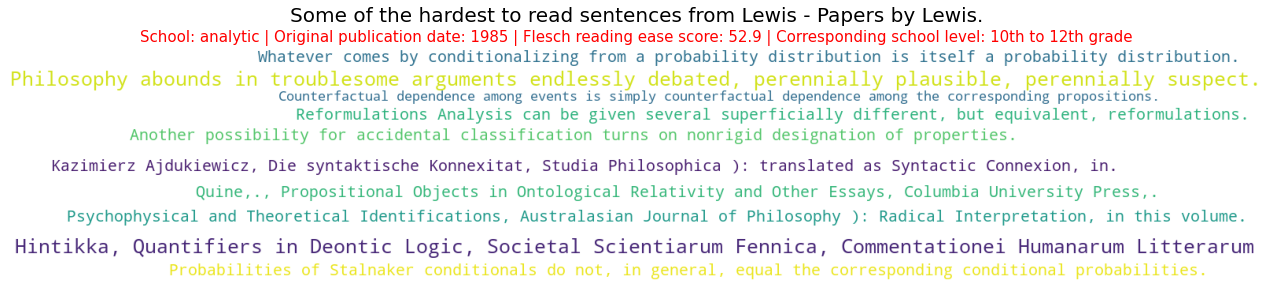

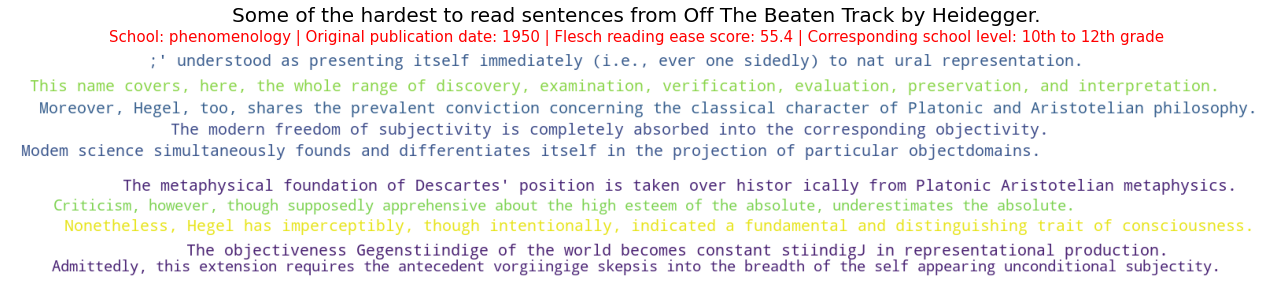

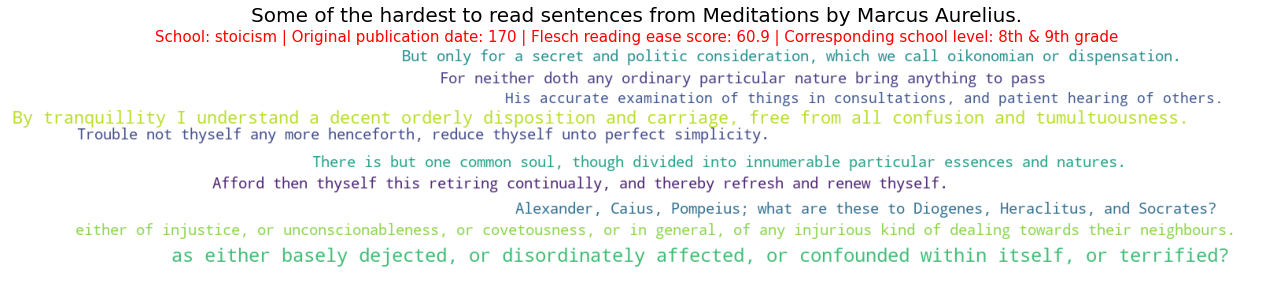

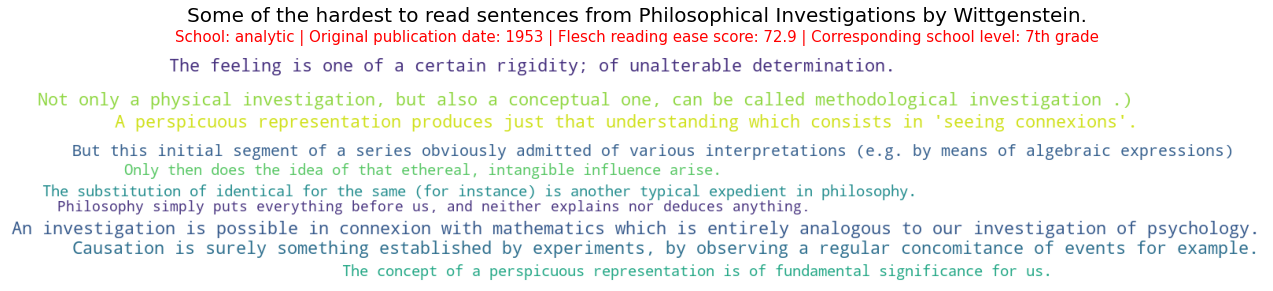

In [22]:
# loop through every 4 texts to generate world cloud
texts_list = list(df_title.index)

i = 0
# The length of the phrase is set to be between 10 and 20 for more visually pleasing wordclouds outputs
while (i < len(texts_list)):
    text_title = texts_list[i]
    l = list(df[(df.title==text_title) 
                & (df.num_words > 10) 
                & (df.num_words < 20)]
             .sort_values("ratio",ascending=False).sentence_spacy[:10])

    # the list of phrases need to be converted to a counter object in order to be used as the source of the wordcloud
    word_could_dict = Counter(l)
    wordcloud = WordCloud(width = 1600, height = 300,
                          background_color ='white', 
                          min_font_size = 15).generate_from_frequencies(word_could_dict)
    
    plt.figure(figsize = (24, 4))
    plt.imshow(wordcloud)
    plt.suptitle("Some of the hardest to read sentences from {t} by {a}.".
                 format(t=text_title, a=df_title.loc[text_title, "author"]), 
                 fontsize=20)
    
    # Provide information on the text
    plt.title("School: {s} | Original publication date: {y} | Flesch reading ease score: {score} | Corresponding school level: {level}".
              format(s=df_title.loc[text_title, "school"], 
                     y=df_title.loc[text_title, "original_publication_date"], 
                     score=df_title.loc[text_title, "Flesch_score"], 
                     level=df_title.loc[text_title, "school_level"])
              , color="red", fontsize=15)
    
    plt.axis("off")
    plt.tight_layout(pad = 0.5)
    plt.savefig("../output/wordcloud_{}.png".format(text_title))
    plt.show()
    print("")
    i+=4


A brief skim-through of all the word clouds show that indeed, those with higher reading ease score generally have less complex sentence structures and and their choices of words are also easier to understand.

## 4. Readability by categories
Seeing what the readability of each text is, someone might ask: if the text I want to read is not on among those 59, how do I know whether they are difficult to read? To answer the question, I will plot readability against original publication dates, school of thoughts, and authors to show the relationship between readability and these different categories.

### 4.1 Readability over time
I want to see whether the original publication date will be a good indication of the readability of the text, and my guess would be that the readability of the book would change over time because of the change of writing styles over time. I would plot the readability score against the original publication date to see whether my guess is true.

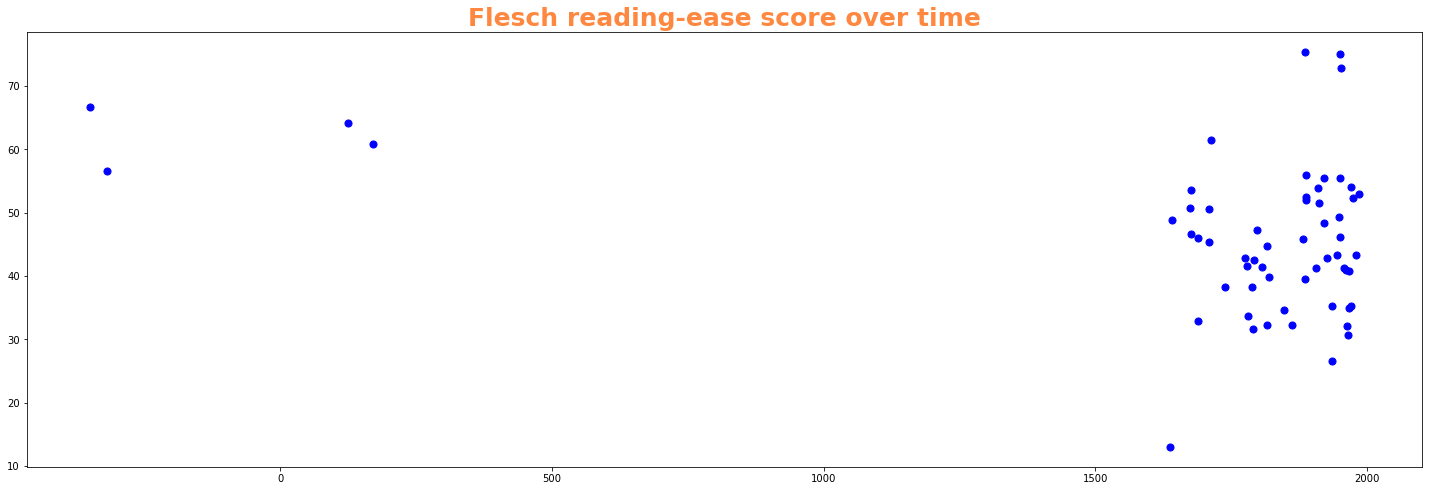

In [23]:
# plot all reading-ease score against the original publication date
plt.figure(figsize=[25,8])
plt.scatter(df_title["original_publication_date"],  df_title["Flesch_score"], s=50, c="blue")
plt.title("Flesch reading-ease score over time", fontsize=25, color="#FF8840", fontweight="bold", 
          horizontalalignment="center")
plt.show()

In this case, we can already see that unfortunately the original publication date is probably not a good indicator of a work's readability. However, I still want to focus on those works published after 1600 to see whether a pattern exist, since the majority of the works in our lists are published after 1600.

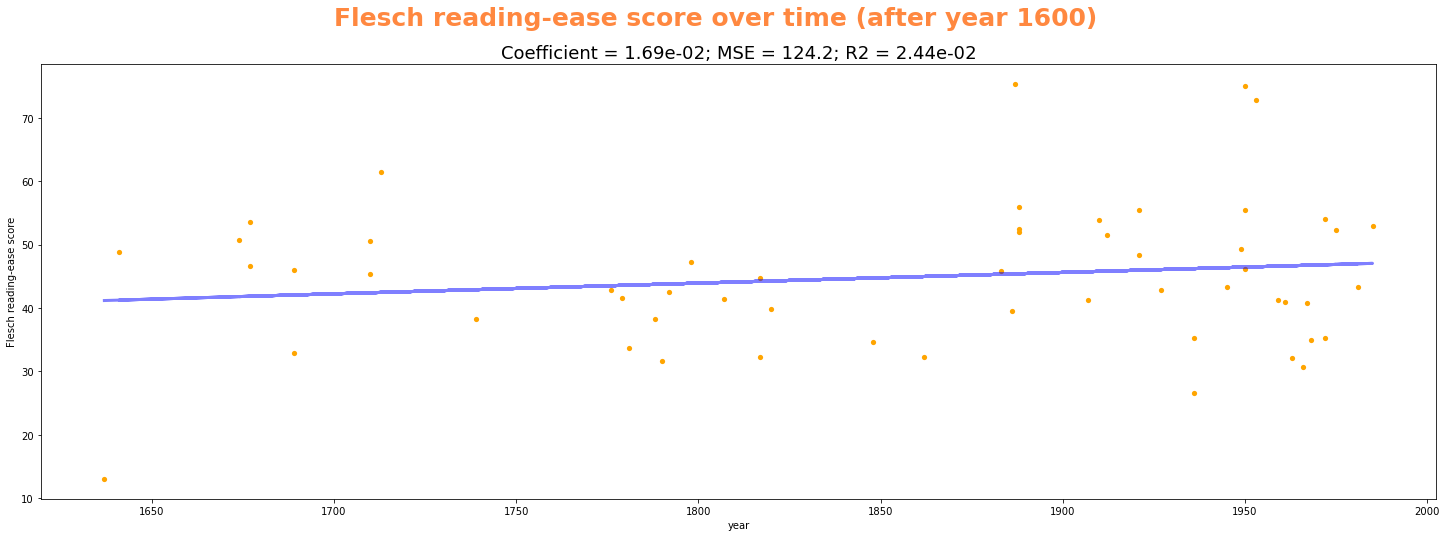

In [24]:
# after 1600
df_after_1600 = df_title[df_title["original_publication_date"]>1600]

x = df_after_1600["original_publication_date"].to_numpy().reshape(-1, 1)
y = df_after_1600["Flesch_score"]
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

fig, ax = plt.subplots(figsize=[25,8])
ax.plot(x, y_pred, color="blue", linewidth=3, alpha=0.5)
ax.scatter(x, y, linewidth=3, c="orange", s=5)
ax.set_xlabel("year", fontsize=10)
ax.set_ylabel("Flesch reading-ease score", fontsize=10)
plt.suptitle("Flesch reading-ease score over time (after year 1600)", fontsize=25, color="#FF8840", fontweight="bold")
plt.title("Coefficient = {:.2e}; MSE = {:.1f}; R2 = {:.2e}".format(reg.coef_[0], mean_squared_error(y, y_pred), r2_score(y, y_pred)), fontsize=18)
plt.savefig("../output/score_over_time.png")

plt.show()

Again, even after limiting the texts to those originally published after 1600, we still don't see a clear pattern between the readability score and the original publication year. After fitting a linear regression, we see that ${R}^2$ is only 2.44e-02.

### 4.2 Readability of texts from different schools


In [25]:
schools = df_title.groupby(["school"])["Flesch_score"].mean()
s = pd.Series([df_title["Flesch_score"].mean()], index=["AVERAGE"])
schools = schools.append(s)
schools = schools.sort_values()
schools.describe()

count    14.000000
mean     47.780962
std       9.688799
min      35.800000
25%      41.200000
50%      44.650000
75%      55.052273
max      66.600000
dtype: float64

In [26]:
schools

continental        35.800000
communism          37.566667
german_idealism    37.757143
capitalism         40.966667
phenomenology      41.900000
rationalism        43.900000
empiricism         44.266667
feminism           45.033333
AVERAGE            46.033898
analytic           54.909091
nietzsche          55.100000
aristotle          56.600000
stoicism           62.500000
plato              66.600000
dtype: float64

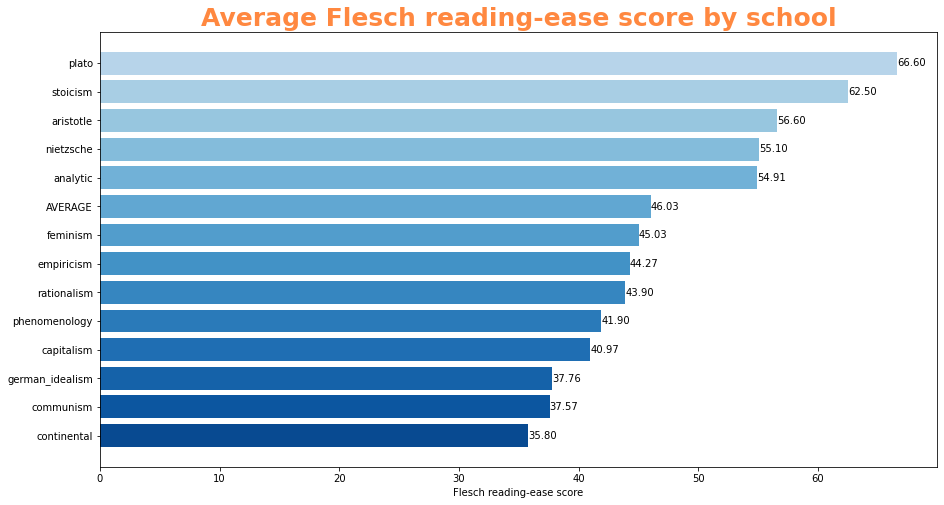

In [27]:
fig, ax = plt.subplots(figsize=[15,8])
colors = plt.get_cmap("Blues")(np.linspace(0.9, 0.3, len(schools)))
hbars = ax.barh(schools.index, schools.values, color=colors)
ax.set_xlabel("Flesch reading-ease score")
ax.bar_label(hbars, fmt='%.2f')
plt.title("Average Flesch reading-ease score by school", fontsize=25, color="#FF8840", fontweight="bold")
plt.savefig("../output/score_by_school.png")
plt.show()

We can see that texts from Plato, Stoicism, Aristotle, Nietzsche, and Analystic schools of thought have relative higher readability while texts from Continental, Communism, German Idealism are among the hardest to read.

### 4.3 Readability of texts by different authors

In [28]:
authors = df_title.groupby(["author"])["Flesch_score"].mean()
authors = authors.append(s)
authors = authors.sort_values()
authors.describe()

count    37.000000
mean     46.397313
std       9.546479
min      30.950000
25%      39.900000
50%      46.033898
75%      52.900000
max      67.833333
dtype: float64

In [29]:
authors.head()

Descartes    30.95
Lenin        32.20
Husserl      33.95
Kant         34.50
Foucault     34.60
dtype: float64

In [30]:
authors.tail()

Aristotle          56.600000
Marcus Aurelius    60.900000
Epictetus          64.100000
Plato              66.600000
Wittgenstein       67.833333
dtype: float64

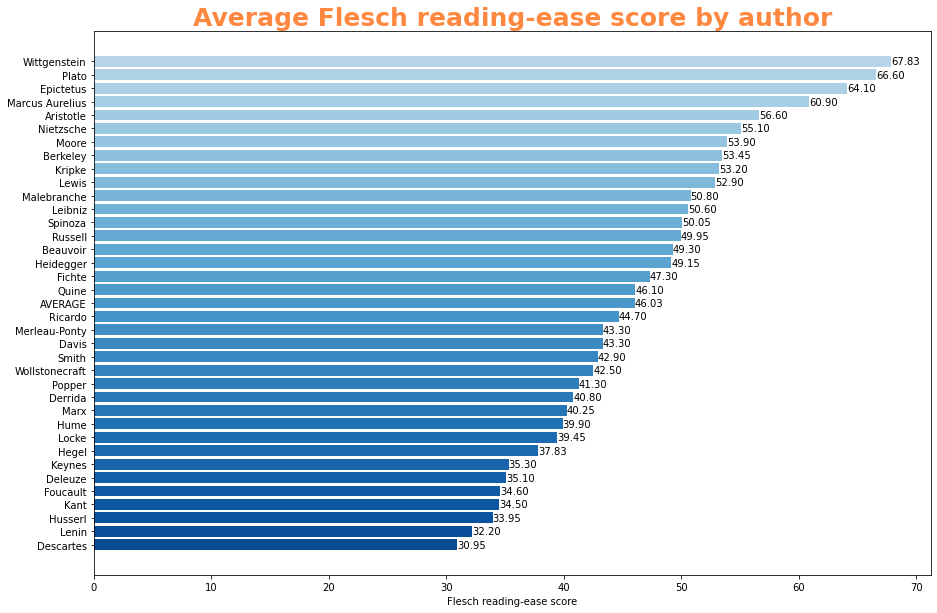

In [31]:
fig, ax = plt.subplots(figsize=[15,10])
colors = plt.get_cmap("Blues")(np.linspace(0.9, 0.3, len(authors)))
hbars = ax.barh(authors.index, authors.values, color=colors)
ax.set_xlabel("Flesch reading-ease score")
ax.bar_label(hbars, fmt='%.2f')
plt.title("Average Flesch reading-ease score by author", fontsize=25, color="#FF8840", fontweight="bold")
plt.savefig("../output/score_by_author.png")
plt.show()

We can see that texts by Wittgenstein, Plato, Epictetus and Marcus Aurelius have relatively higher readability, while the texts by Descartes, Lenin, Husserl, Kant and many others are much harder to read

## 5. Conclusion
As the analysis demonstrates, the majority (64.3%) of the texts require at least college level education to read based on the Flesch reading ease score. The average score of 46.0 points corresponds to college level education (in comparison, Time magazine scores 52 points). I will conclude that in general, philosphy texts are difficult to understand.

However, not all the philosophy texts are difficult to read based on the texts' Flesch reading ease score. The collection of 59 texts we have in the dataset has a wide spread of reading ease score from 75.4 (7th grade) to 13.0 (College graduate). So people  with less experience reading philosophy texts (even high school students) can start with those that are easier to understand, and theoretically they will be able to read some of those texts.

### 5.1 Limitations
This dataset only contains 59 texts and some of the sentences are not seperated properly so that can impact the result. In addition, a lot of words with long syllables are names and in philosophy texts those names tends to repeat multiple times. However, due to the quantity of data available, the result from this analysis will be relatively accurate. 

Another limitation is that because many of the texts are translated version so the readability also depends on the particular version's translator's style. Some might potentially find versions translated with easier to understand choice of words and styles.

The biggest limitation of this analysis is the disctinction between understanding and reading. Alghouth the analysis provides some indications on these texts' reading ease score based on a particular formula, the reading ease score does not directly translate into the level of difficulty in fully understanding the text, especially consider the abstract nature of philosophy texts. However, if you are scared of reading philosophy texts, don't be! You can use the analysis' findings as an indicator when choosing your text to start! You will only know if you can understand the text if you actually start reading them yourself!